In [77]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter
import os
import io
import pandas as pd
import numpy as np
import cv2
from scipy.spatial.distance import cdist

In [75]:
# processing new data

directory = os.path.join('./', '../', 'test data', '203_college_straight', 'obj_train_data')
# directory = os.path.join('./', '../', 'test data', 'wii_mii', 'obj_train_data')

data = []

# Loop over each file in the directory
frame = 0
for filename in sorted(os.listdir(directory)):
    if filename.endswith('.txt'):
        # Construct the full path to the file
        file_path = os.path.join(directory, filename)
        
        # Extract the ID from the filename (assuming the ID is the filename without extension)
        file_id = frame
        
        # Read the file line by line
        with open(file_path, 'r') as file:
            for line in file:
                values = line.strip().split()
                
                # Append the values as a new row in the list with the ID
                data.append([file_id] + [float(v) for v in values])
                # for i in range(9):
                #     data.append([file_id+i+1] + [np.nan for v in values])
        frame += 10

# Convert the list to a DataFrame
result_df = pd.DataFrame(data, columns=['frame', 'id', 'value1', 'value2', 'value3', 'value4'])
result_df['value1'] = result_df['value1'] * 1920
result_df['value2'] = result_df['value2'] * 1080
result_df['value3'] = result_df['value3'] * 1920
result_df['value4'] = result_df['value4'] * 1080
# result_df['value1'] = result_df['value1'] * 1062
# result_df['value2'] = result_df['value2'] * 560
# result_df['value3'] = result_df['value3'] * 1062
# result_df['value4'] = result_df['value4'] * 560
result_df['value2'] = result_df['value2'] - result_df['value4'] / 4
# result_df['frame'] *= 10

# Save the resulting DataFrame to a CSV file
result_df = result_df.drop(['value3', 'value4'], axis=1)
output_path = 'new.csv'
result_df.to_csv(output_path, index=False, header=False)

print(f'Data saved to {output_path}')

Data saved to new.csv


In [76]:
column_names = ["FrameID", "PedID", "PosX", "PosY"]
gt_df = pd.read_csv(os.path.join(
    '.', 'zara_02.csv'), names=column_names)
# gt_df = pd.read_csv(os.path.join(
#     '.', 'new.csv'), names=column_names)
# mo_df = pd.read_csv(os.path.join(
#     '.', 'zara_m7.txt'), names=column_names)
mo_df = pd.read_csv(os.path.join(
    '.', 'baseline.txt'), names=column_names)
# mo_df = pd.read_csv(os.path.join(
#     '.', 'college_m.txt'), names=column_names)
# mo_df = pd.read_csv(os.path.join(
#     '.', 'mii_m.txt'), names=column_names)

In [74]:
def shortest_distance(df1, df2):
    unique_ids = df1['FrameID'].unique()
    # unique_ids = [246]
    shortest_distances = []

    for unique_id in unique_ids:
        # Extract points for the current ID
        points_df1 = df1[df1['FrameID'] == unique_id][['PosX', 'PosY']].values
        points_df2 = df2[df2['FrameID'] == unique_id][['PosX', 'PosY']].values

        if points_df1.size == 0 or points_df2.size == 0:
            print(f"No matching points for ID {unique_id} in one of the DataFrames.")
            continue
        
        # Calculate all pairwise distances
        distances = cdist(points_df1, points_df2, metric='euclidean')
        # print(distances)
        
        # Find the minimum distance
        min_distance = distances.min(axis=1)
        # print(min_distance)
        shortest_distances.append((unique_id, np.average(min_distance)))
    
    # Convert result to DataFrame
    return pd.DataFrame(shortest_distances, columns=['ID', 'dist'])

# Calculate shortest distances
result = shortest_distance(gt_df, mo_df)

No matching points for ID 3840.0 in one of the DataFrames.
No matching points for ID 3841.0 in one of the DataFrames.
No matching points for ID 3842.0 in one of the DataFrames.
No matching points for ID 3843.0 in one of the DataFrames.
No matching points for ID 3844.0 in one of the DataFrames.
No matching points for ID 3845.0 in one of the DataFrames.
No matching points for ID 3846.0 in one of the DataFrames.
No matching points for ID 3847.0 in one of the DataFrames.
No matching points for ID 3848.0 in one of the DataFrames.
No matching points for ID 3849.0 in one of the DataFrames.
No matching points for ID 3850.0 in one of the DataFrames.
No matching points for ID 3851.0 in one of the DataFrames.
No matching points for ID 3852.0 in one of the DataFrames.
No matching points for ID 10519.0 in one of the DataFrames.


In [78]:
cgt_df = gt_df.groupby('FrameID').size().reset_index(name='counts')
cmo_df = mo_df.groupby('FrameID').size().reset_index(name='counts')

In [79]:
print(gt_df[gt_df['FrameID'] == 30])
print(mo_df[mo_df['FrameID'] == 30])

    FrameID  PedID        PosX        PosY
20     30.0    1.0  687.785714  332.642857
    FrameID  PedID  PosX  PosY
22       30      1   680   373


In [81]:
result

,ID,dist
0,10.0,36.607822
1,11.0,36.222984
2,12.0,36.235342
3,13.0,35.890174
4,14.0,21.636373
...,...,...
10491,10514.0,146.988583
10492,10515.0,151.275898
10493,10516.0,155.881341
10494,10517.0,158.468583


mean:  4.321180390290338
median:  4.0
max:  13.0
std:  3.332849459197569


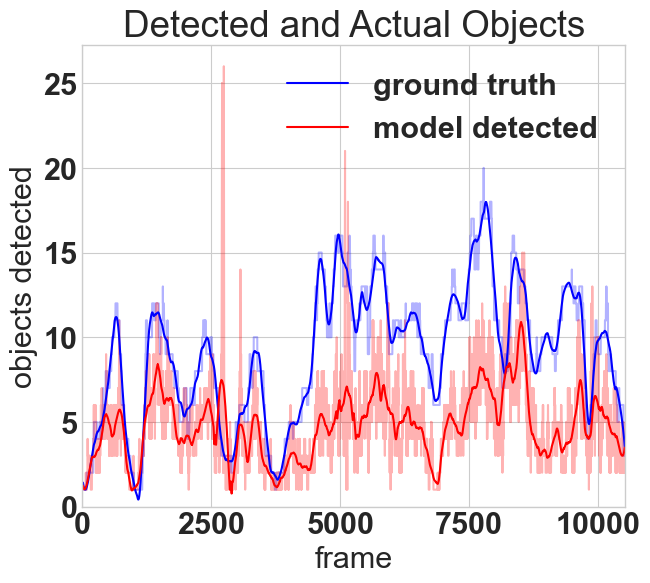

In [80]:
# plots data if logging is true


plt.style.use("seaborn-v0_8-whitegrid")

font = {'weight': 'bold',
        'size': 22,
        }

text = {'usetex': True
        }

plt.rc('font', **font)

cgt_df['count'] = savgol_filter(cgt_df['counts'], int(np.floor(len(cgt_df['counts']))*0.03), 3)
cmo_df['count'] = savgol_filter(cmo_df['counts'], int(np.floor(len(cmo_df['counts']))*0.03), 3)
# cgt_df['count'] = cgt_df['counts']
# cmo_df['count'] = cmo_df['counts']

fig, ax = plt.subplots(figsize=(7, 6))

ax.set_title('Detected and Actual Objects')
ax.set_xlabel('frame')
ax.set_ylabel('objects detected')

ax.plot(cgt_df['FrameID'], cgt_df['counts'], color='blue', alpha=0.3)
ax.plot(cmo_df['FrameID'], cmo_df['counts'], color='red', alpha=0.3)

ax.plot(cgt_df['FrameID'], cgt_df['count'], label='ground truth', color='blue')
ax.plot(cmo_df['FrameID'], cmo_df['count'], label='model detected', color='red')

ax.set_xbound(0, np.max(cgt_df['FrameID']))
ax.set_ybound(0)

ax.legend()

print("mean: ", np.mean(cgt_df['counts']- cmo_df['counts']))
print("median: ", np.median((cgt_df['counts']- cmo_df['counts']).fillna(0)))
print("max: ", np.max(cgt_df['counts']- cmo_df['counts']))
print("std: ", np.std(cgt_df['counts']- cmo_df['counts']))

plt.savefig(os.path.join('.', 'detect.png'), bbox_inches='tight')

In [82]:
print(np.mean((cgt_df.set_index("FrameID")['counts']- cmo_df['counts'])[(cgt_df.set_index("FrameID")['counts']- cmo_df['counts']).isna() == False]))
print(np.median((cgt_df.set_index("FrameID")['counts']- cmo_df['counts'])[(cgt_df.set_index("FrameID")['counts']- cmo_df['counts']).isna() == False]))
print(np.min((cgt_df.set_index("FrameID")['counts']- cmo_df['counts'])[(cgt_df.set_index("FrameID")['counts']- cmo_df['counts']).isna() == False]))
print(np.std((cgt_df.set_index("FrameID")['counts']- cmo_df['counts'])[(cgt_df.set_index("FrameID")['counts']- cmo_df['counts']).isna() == False]))

4.3233920914721296
4.0
-23.0
3.3599440664589335


med  31.365233265794416
std  43.50135561191251
iqr  25.338733229881978


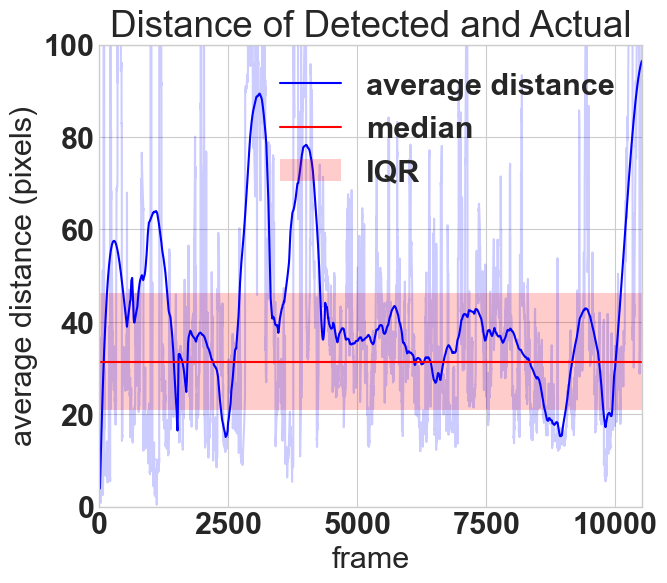

In [83]:
fig, ax = plt.subplots(figsize=(7, 6))

result['sd'] = savgol_filter(result['dist'], int(np.floor(len(result['dist']))*0.1), 3)
# result['sd'] = result['dist']

ax.set_title('Distance of Detected and Actual')
ax.set_xlabel('frame')
ax.set_ylabel('average distance (pixels)')

med = np.median(result['dist'])
std = np.std(result['dist'])
p25, p75 = np.percentile(result['dist'], [25, 75])

ax.plot(result['ID'], result['dist'], color='blue', alpha=0.2)
ax.plot(result['ID'], result['sd'], color='blue', label='average distance')
# ax.fill_between(result['ID'], result['sd']-std, result['sd']+std, color='blue', alpha=0.3)
video_out_path = os.path.join('.', 'clip_m.mp4')
ax.axhline(y=med, color='r', label='median')
# ax.axhspan(med+std, med-std, facecolor='red', alpha=0.2)
ax.axhspan(p25, p75, facecolor='red', alpha=0.2, label='IQR')

ax.set_xbound(0, np.max(result['ID']))
ax.set_ybound(0, 100)
ax.legend()

print('med ', med)
print('std ', std)
print('iqr ', p75-p25)

plt.savefig(os.path.join('.', 'distance.png'), bbox_inches='tight')